In [366]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

In [367]:
import urllib.request

# URL del archivo que quieres descargar
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

# Ruta donde deseas guardar el archivo
file_path = "haarcascade_frontalface_default.xml"

# Descargar el archivo
urllib.request.urlretrieve(url, file_path)

print("Archivo descargado correctamente.")

Archivo descargado correctamente.


In [368]:
# Ruta de la imagen
img_path = r"imagenes_MVP\sweden-2022-family-in-shopping-mall-free-photo.jpg"

# Leer la imagen
img = cv2.imread(img_path)

In [369]:
img

array([[[138,  67,  77],
        [138,  67,  77],
        [139,  68,  78],
        ...,
        [106, 121, 137],
        [107, 122, 138],
        [107, 122, 138]],

       [[138,  67,  77],
        [139,  68,  78],
        [140,  69,  79],
        ...,
        [108, 123, 139],
        [108, 123, 139],
        [108, 123, 139]],

       [[139,  68,  78],
        [139,  68,  78],
        [140,  69,  79],
        ...,
        [109, 124, 140],
        [109, 124, 140],
        [109, 124, 140]],

       ...,

       [[118, 114, 109],
        [118, 114, 109],
        [118, 114, 109],
        ...,
        [199, 190, 186],
        [199, 190, 186],
        [199, 190, 186]],

       [[120, 116, 111],
        [119, 115, 110],
        [118, 114, 109],
        ...,
        [198, 189, 185],
        [198, 189, 185],
        [198, 189, 185]],

       [[121, 117, 112],
        [120, 116, 111],
        [118, 114, 109],
        ...,
        [198, 189, 185],
        [198, 189, 185],
        [198, 189, 185]]

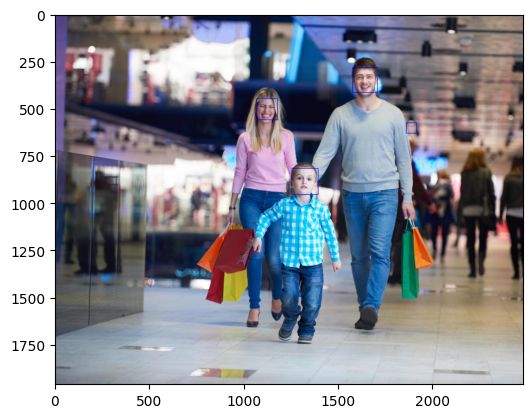

In [370]:
# Carga el clasificador Haar Cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Convierte la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
gray = cv2.equalizeHist(gray)
# Detecta los rostros
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.03, minNeighbors=70, minSize=(20, 20))
# Ajuste los parámetros para que no detecte todo como una cara sin dejar ninguna afuera
# Dibuja rectángulos alrededor de las caras detectadas
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Muestra la imagen con los rostros detectados
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [371]:
# Cargar el modelo guardado
custom_model = load_model("model_VGG16.keras")

In [372]:
# Definir la función para preprocesar la cara
def preprocess_face(face_img):
    # Redimensionar la cara al tamaño requerido por el modelo
    face_resized = cv2.resize(face_img, (224, 224))
    
    # Convertir la imagen a formato array y preprocesar (según el modelo)
    face_array = np.array(face_resized)
    
    # Expandir las dimensiones para que tenga el formato (1, 224, 224, 3)
    face_array = np.expand_dims(face_array, axis=0)
    
    # Aplicar la preprocesación de ResNet50
    face_preprocessed = preprocess_input(face_array)
    
    return face_preprocessed

In [373]:
names = ["1.niños", "2.adolescentes", "3.jovenes_adultos", "4.adultos", "5.adultos_mayores", "6.tercera_edad"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


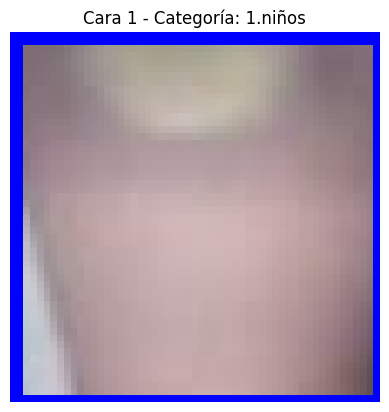

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


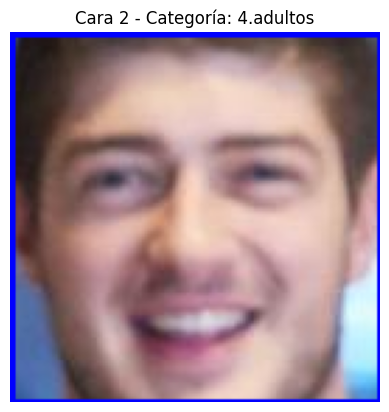

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


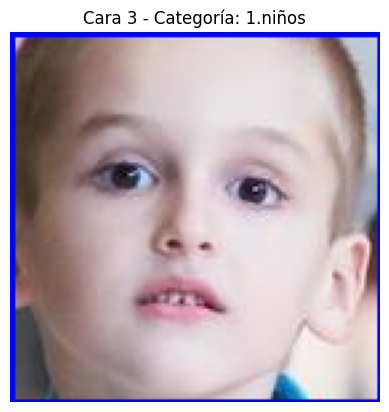

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


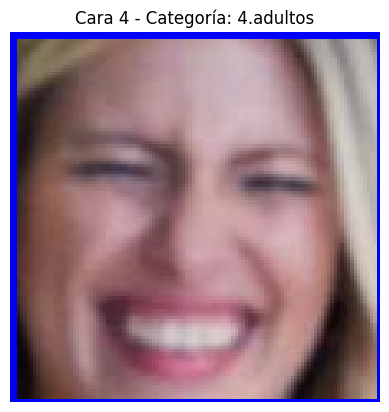

In [374]:
# Detectar y procesar las caras
for i, (x, y, w, h) in enumerate(faces):
    # Recortar la cara de la imagen original
    face = img[y:y+h, x:x+w]

    # Preprocesar la cara para hacer predicciones
    face_preprocessed = preprocess_face(face)
    
    # Hacer la predicción con el modelo
    prediction = custom_model.predict(face_preprocessed)
    
    # Obtener la clase predicha (categoría) con el índice de mayor probabilidad
    predicted_class = np.argmax(prediction, axis=1)[0]  # Obtener el índice de la clase
    
    # Obtener el nombre de la categoría predicha
    predicted_category = names[predicted_class]

    # Mostrar la cara usando matplotlib
    plt.figure()
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB
    plt.title(f'Cara {i+1} - Categoría: {predicted_category}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

---